<a href="https://colab.research.google.com/github/salahagnir/CA2/blob/main/CA_2_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acquiring transportation data from sources like Transport Infrastructure Ireland (TII) offers valuable insights into Ireland's transport sector, aiding in analyzing passenger journeys, Luas Line data, and local transport trends. However, challenges such as fragmented data, potential data quality issues, and licensing restrictions might limit the comprehensive analysis scope and impose constraints on data usage, distribution, or modification. Understanding and navigating these challenges are crucial for conducting an ethical and legal analysis while ensuring compliance with licensing terms for the dataset's proper utilization.


Data Acquisition Process:
Identification of Data Sources: Using repositories like data.gov.ie and other relevant sources, select datasets related to Irish transport covering vehicle traffic, types, freight transport, air traffic, and transport infrastructure.

Data Evaluation and Selection: Assess the datasets based on relevance, reliability, coverage, and permissions/licenses. Evaluate positives (comprehensiveness, granularity) and negatives (data gaps, inconsistencies).

Data Gathering and Permissions: Retrieve data from reputable sources, ensuring compliance with permissions/licenses. Some datasets might be openly accessible, while others may require specific permissions due to privacy or proprietary reasons.

Cleaning and Preprocessing: Prepare data for analysis by cleaning, formatting, and harmonizing different datasets. Address missing values, inconsistencies, and outliers.

Integration and Analysis: Combine datasets to create a comprehensive view of Ireland's transport landscape. Perform statistical analysis, trend identification, and comparative analysis with other countries' transport data.

Positive Aspects of Data Acquisition:
Access to Multiple Datasets: Utilizing repositories like data.gov.ie provides a variety of datasets covering diverse aspects of transport, enabling a comprehensive analysis.

Potential for Insights: Availability of big data related to smartcard ticketing systems in Ireland can provide granular insights into passenger behaviors and needs.

Negative Aspects of Data Acquisition:
Data Fragmentation: Datasets might be fragmented across different sources, requiring significant effort to integrate and analyze comprehensively.

Licensing and Permissions: Some datasets might have restrictions or complex licensing terms, limiting their usage or requiring additional permissions, potentially slowing down the analysis.

Licensing/Permissions Implications:


The accessibility section on the website outlines its commitment to ensuring that all users, including those with disabilities, can access and use the content.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#warnings
import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv('/content/drive/MyDrive/CA2/TII01.20231126154500.csv')

In [81]:
df.head()

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,Weeks of the year,UNIT,VALUE
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Week 01,Number,549533.0
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Week 02,Number,839022.0
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Week 03,Number,819359.0
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Week 04,Number,860745.0
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Week 05,Number,912795.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          795 non-null    object 
 1   Statistic Label    795 non-null    object 
 2   TLIST(W1)          795 non-null    int64  
 3   Year               795 non-null    int64  
 4   C03132V03784       795 non-null    object 
 5   Luas Line          795 non-null    object 
 6   C01198V01436       795 non-null    int64  
 7   Weeks of the year  795 non-null    object 
 8   UNIT               795 non-null    object 
 9   VALUE              744 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 62.2+ KB


In [83]:
df.shape

(795, 10)

In [84]:
df.dtypes

STATISTIC             object
Statistic Label       object
TLIST(W1)              int64
Year                   int64
C03132V03784          object
Luas Line             object
C01198V01436           int64
Weeks of the year     object
UNIT                  object
VALUE                float64
dtype: object

In [85]:
df.describe()

,TLIST(W1),Year,C01198V01436,VALUE
count,795.000000,795.000000,795.000000,7.440000e+02
mean,2021.000000,2021.000000,27.000000,4.326046e+05
std,1.415104,1.415104,15.306688,2.646196e+05
min,2019.000000,2019.000000,1.000000,1.972700e+04
25%,2020.000000,2020.000000,14.000000,2.257425e+05
50%,2021.000000,2021.000000,27.000000,4.148065e+05
75%,2022.000000,2022.000000,40.000000,5.244765e+05
max,2023.000000,2023.000000,53.000000,1.173473e+06


In [86]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [87]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
STATISTIC            0.000000
Statistic Label      0.000000
TLIST(W1)            0.000000
Year                 0.000000
C03132V03784         0.000000
Luas Line            0.000000
C01198V01436         0.000000
Weeks of the year    0.000000
UNIT                 0.000000
VALUE                6.415094
dtype: float64


<Axes: >

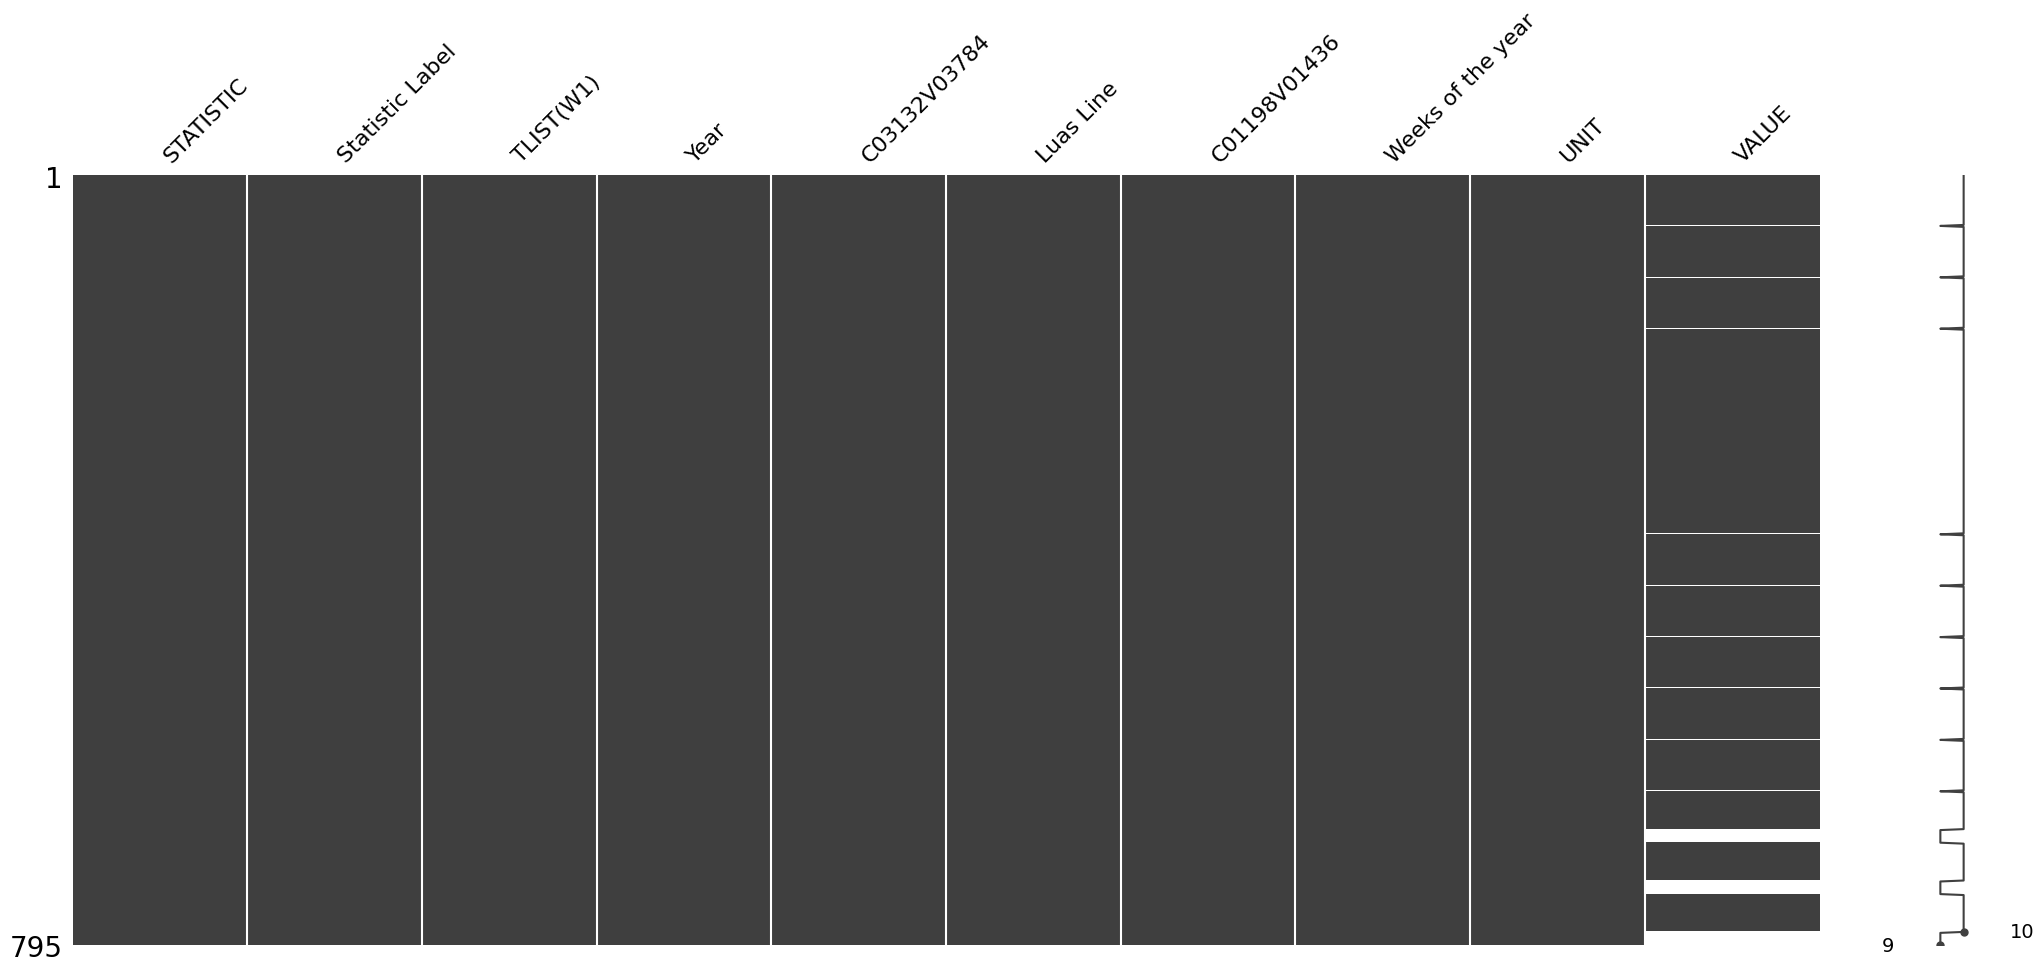

In [88]:
import missingno as msno
msno.matrix(df)

In [89]:
df=df.dropna()

In [90]:
df.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Year                 0
C03132V03784         0
Luas Line            0
C01198V01436         0
Weeks of the year    0
UNIT                 0
VALUE                0
dtype: int64

In [91]:
df

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,Weeks of the year,UNIT,VALUE
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Week 01,Number,549533.0
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Week 02,Number,839022.0
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Week 03,Number,819359.0
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Week 04,Number,860745.0
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Week 05,Number,912795.0
...,...,...,...,...,...,...,...,...,...,...
776,TII01C01,Passenger Journeys,2023,2023,2,Green line,35,Week 35,Number,411878.0
777,TII01C01,Passenger Journeys,2023,2023,2,Green line,36,Week 36,Number,432905.0
778,TII01C01,Passenger Journeys,2023,2023,2,Green line,37,Week 37,Number,445474.0
779,TII01C01,Passenger Journeys,2023,2023,2,Green line,38,Week 38,Number,498593.0


In [92]:
import plotly.express as px
# Create a histogram for a numerical column (e.g., 'VALUE' in your dataset)
fig = px.histogram(df, x='VALUE', title='Histogram of Passenger Journeys')
fig.show()

In [93]:
total_passenger_journeys = df.groupby('Luas Line')['VALUE'].sum()
print(total_passenger_journeys)

Luas Line
All Luas lines    160928894.0
Green line         78047147.0
Red line           82881757.0
Name: VALUE, dtype: float64


In [94]:
color_scheme = ['blue', 'red', 'green']

fig = px.bar(df, x='Luas Line', y='VALUE', title='Bar Plot of Passenger Journeys by Luas Line', color='Luas Line', color_discrete_sequence=color_scheme)
fig.show()

In [95]:
color_scheme = ['blue', 'red', 'green']

fig = px.box(df, x='Luas Line', y='VALUE', title='Box Plot of Passenger Journeys by Luas Line', color='Luas Line', color_discrete_sequence=color_scheme)
fig.show()

1. **Libraries Import:**
   - Importing essential libraries like Pandas, NumPy, Seaborn, Matplotlib, Warnings, Plotly Express, and Missingno.

2. **Reading CSV Data:**
   - Loading a CSV file into a Pandas DataFrame named `df`.

3. **Initial Data Exploration:**
   - Displaying the first few rows of the DataFrame `df`.
   - Providing information about the DataFrame, including data types and non-null counts.
   - Determining the shape of the DataFrame (rows, columns).
   - Showing the data types of each column.
   - Generating summary statistics of numerical columns.

4. **Handling Duplicate Rows:**
   - Identifying and printing the number of duplicate rows in the DataFrame.

5. **Missing Values Analysis:**
   - Calculating the percentage of missing values in each column and printing them.
   - Visualizing missing values in the DataFrame using the `missingno` library.

6. **Handling Missing Values:**
   - Dropping rows with any missing values from the DataFrame.

7. **Data Visualization:**
   - Creating a histogram using Plotly Express for the numerical column 'VALUE' to visualize the distribution of passenger journeys.
   - Grouping the data by 'Luas Line' and calculating the total passenger journeys for each line.
   - Generating bar plots and box plots using Plotly Express to represent passenger journeys for different 'Luas Line' categories.

 How this helps:

- **Data Understanding and Cleaning:** The code aids in understanding the dataset's structure, checking for duplicate and missing values, and addressing them (dropping rows with missing values).

- **Data Visualization:** The code utilizes various plots (histograms, bar plots, and box plots) to visually represent the distribution and comparison of passenger journeys across different 'Luas Line' categories, facilitating interpretation and communication of insights from the data.

- **Insights:** The histograms showcase the distribution of passenger journeys, while bar plots and box plots provide insights into comparing passenger journeys across different 'Luas Line' categories, such as identifying trends, outliers, or differences in passenger counts between various lines.

The codes is useful for exploring data, cleaning it, and visualizing insights regarding passenger journeys across different 'Luas Line' categories.

In [96]:
pip install dash pandas plotly

In [97]:
import dash
from dash import dcc, html
import plotly.express as px

In [98]:
total_passenger_journeys = df.groupby('Luas Line')['VALUE'].sum()
print(total_passenger_journeys)

Luas Line
All Luas lines    160928894.0
Green line         78047147.0
Red line           82881757.0
Name: VALUE, dtype: float64


In [99]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1('Luas Line Statistics Dashboard'),
    dcc.Graph(
        id='luas-line-stats',
        figure=px.line(df, x='Weeks of the year', y='VALUE', color='Luas Line', title='Luas Line Statistics')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

The code performs the following actions:

1)Installs necessary libraries using pip install dash pandas plotly.
2)Imports required modules including Dash components (dash, dcc, html) and Plotly Express (plotly.express).
3)Groups the data by 'Luas Line' and calculates the total passenger journeys for each line using df.groupby('Luas Line')['VALUE'].sum(). The code then prints the total passenger journeys for each 'Luas Line'.
4)Initializes a Dash app and defines the layout of the dashboard using HTML components such as html.H1 and dcc.Graph.
5)Creates a line plot (px.line) in the Dash app, visualizing 'Luas Line' statistics over weeks of the year using the DataFrame (df) columns 'Weeks of the year' and 'VALUE'. This representation demonstrates the trend of passenger journeys over time for different 'Luas Line' categories.
Benefits and Impact:

Assists in exploring and displaying the total passenger journeys for different 'Luas Line' categories over time through interactive line plots.
Enables potential insights into variations, trends, or peak periods in passenger journeys across various 'Luas Line' categories.
Utilizes Dash to create an interactive web-based platform for data presentation and exploration without modifying the original dataset (df).

In [100]:
# Convert 'Weeks of the year' column to extract numerical week information
df['Numerical_Week'] = df['Weeks of the year'].str.extract('(\d+)').astype(int)

In [101]:
df=df.drop(["STATISTIC","Statistic Label","TLIST(W1)","C03132V03784","C01198V01436","UNIT","Weeks of the year"],axis=1)

In [102]:
df = pd.get_dummies(df, columns=['Luas Line'])

In [103]:
df

,Year,VALUE,Numerical_Week,Luas Line_All Luas lines,Luas Line_Green line,Luas Line_Red line
0,2019,549533.0,1,1,0,0
1,2019,839022.0,2,1,0,0
2,2019,819359.0,3,1,0,0
3,2019,860745.0,4,1,0,0
4,2019,912795.0,5,1,0,0
...,...,...,...,...,...,...
776,2023,411878.0,35,0,1,0
777,2023,432905.0,36,0,1,0
778,2023,445474.0,37,0,1,0
779,2023,498593.0,38,0,1,0



The codes executes various data preprocessing tasks that can be advantageous in Machine Learning (ML):

1. **Convert 'Weeks of the year' column:**
   - The code extracts numerical week information from the 'Weeks of the year' column and creates a new column 'Numerical_Week' containing the extracted numerical information. This allows the ML model to understand and utilize the week information in a numerical format, which might be useful in time-related analysis or predictions.

2. **Data Preprocessing:**
   - The code removes several columns ('STATISTIC', 'Statistic Label', 'TLIST(W1)', 'C03132V03784', 'C01198V01436', 'UNIT', 'Weeks of the year') from the DataFrame (`df`) using `df=df.drop([...],axis=1)`. This step eliminates irrelevant or redundant columns that might not contribute significantly to the ML model's learning process or prediction.

3. **One-Hot Encoding:**
   - It performs one-hot encoding using `pd.get_dummies()` on the 'Luas Line' column, creating dummy variables for categorical data ('Luas Line_All Luas lines', 'Luas Line_Green line', 'Luas Line_Red line'). This process converts categorical variables into a numerical format suitable for ML algorithms, making it easier for the model to interpret and process categorical data.

 How this can help in ML:

- **Feature Engineering:** The creation of the 'Numerical_Week' column from the 'Weeks of the year' column provides additional numerical information derived from a time-related feature. This newly engineered feature can potentially improve the ML model's performance by considering the numerical week information.

- **Dimensionality Reduction:** Dropping irrelevant columns reduces the dimensionality of the dataset, focusing on more meaningful features. This can prevent overfitting and improve the model's generalization capability.

- **Handling Categorical Data:** One-hot encoding converts categorical data into a format suitable for ML algorithms. This transformation allows algorithms that work with numerical data to effectively use categorical variables in the learning process.

By performing these data preprocessing steps, the code aims to improve the quality of the data and make it more suitable for ML algorithms, potentially leading to better model performance, enhanced predictions, and improved insights.

In [104]:
df1 = pd.read_csv('/content/drive/MyDrive/CA2/TII01.20231126154500.csv')

In [105]:
df1

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,Weeks of the year,UNIT,VALUE
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Week 01,Number,549533.0
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Week 02,Number,839022.0
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Week 03,Number,819359.0
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Week 04,Number,860745.0
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Week 05,Number,912795.0
...,...,...,...,...,...,...,...,...,...,...
790,TII01C01,Passenger Journeys,2023,2023,2,Green line,49,Week 49,Number,NaN
791,TII01C01,Passenger Journeys,2023,2023,2,Green line,50,Week 50,Number,NaN
792,TII01C01,Passenger Journeys,2023,2023,2,Green line,51,Week 51,Number,NaN
793,TII01C01,Passenger Journeys,2023,2023,2,Green line,52,Week 52,Number,NaN


In [106]:
# Convert 'Weeks of the year' column to extract numerical week information
df1['Weeks'] = df1['Weeks of the year'].str.extract('(\d+)').astype(int)

In [107]:
df=df1.drop(["Weeks of the year"],axis=1)

In [108]:
df

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,UNIT,VALUE,Weeks
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Number,549533.0,1
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Number,839022.0,2
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Number,819359.0,3
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Number,860745.0,4
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Number,912795.0,5
...,...,...,...,...,...,...,...,...,...,...
790,TII01C01,Passenger Journeys,2023,2023,2,Green line,49,Number,NaN,49
791,TII01C01,Passenger Journeys,2023,2023,2,Green line,50,Number,NaN,50
792,TII01C01,Passenger Journeys,2023,2023,2,Green line,51,Number,NaN,51
793,TII01C01,Passenger Journeys,2023,2023,2,Green line,52,Number,NaN,52


In [109]:
df=df.dropna()

In [110]:
df

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,UNIT,VALUE,Weeks
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Number,549533.0,1
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Number,839022.0,2
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Number,819359.0,3
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Number,860745.0,4
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Number,912795.0,5
...,...,...,...,...,...,...,...,...,...,...
776,TII01C01,Passenger Journeys,2023,2023,2,Green line,35,Number,411878.0,35
777,TII01C01,Passenger Journeys,2023,2023,2,Green line,36,Number,432905.0,36
778,TII01C01,Passenger Journeys,2023,2023,2,Green line,37,Number,445474.0,37
779,TII01C01,Passenger Journeys,2023,2023,2,Green line,38,Number,498593.0,38


Six Rules of Tuft's

Show the data:

Emphasizes the core purpose of any visualization to accurately and clearly convey the underlying data.


In [111]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df1.head())

First few rows of the dataset:
  STATISTIC     Statistic Label  TLIST(W1)  Year C03132V03784       Luas Line  \
0  TII01C01  Passenger Journeys       2019  2019            -  All Luas lines   
1  TII01C01  Passenger Journeys       2019  2019            -  All Luas lines   
2  TII01C01  Passenger Journeys       2019  2019            -  All Luas lines   
3  TII01C01  Passenger Journeys       2019  2019            -  All Luas lines   
4  TII01C01  Passenger Journeys       2019  2019            -  All Luas lines   

   C01198V01436 Weeks of the year    UNIT     VALUE  Weeks  
0             1           Week 01  Number  549533.0      1  
1             2           Week 02  Number  839022.0      2  
2             3           Week 03  Number  819359.0      3  
3             4           Week 04  Number  860745.0      4  
4             5           Week 05  Number  912795.0      5  


Maximize the data-ink ratio:

A measure of the ink (or pixels) used to represent non-redundant data information compared to the total ink used in the graphic.


Data-Ink Ratio: 721007.6120071685


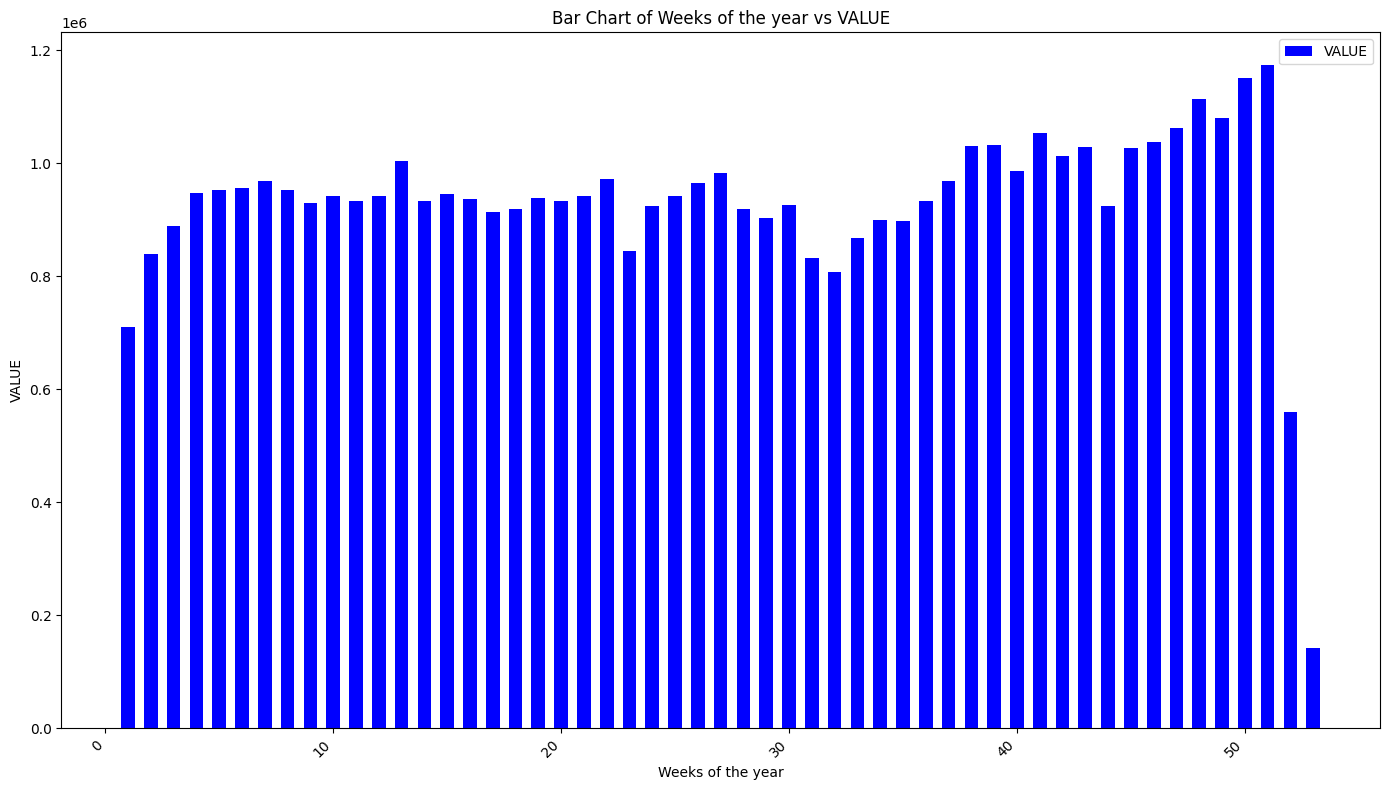

In [112]:

bar_width = 0.6

# Plotting the bar chart
plt.figure(figsize=(14, 8))  # Increased figure size
plt.bar(df['Weeks'], df['VALUE'], width=bar_width, color='blue', label='VALUE')

# Adding labels and title
plt.xlabel('Weeks of the year')
plt.ylabel('VALUE')
plt.title('Bar Chart of Weeks of the year vs VALUE')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Calculating data-ink ratio
total_ink = len(df)
total_length_of_bars = total_ink * bar_width
data_ink = df['VALUE'].sum()
data_ink_ratio = data_ink / total_length_of_bars

print(f"Data-Ink Ratio: {data_ink_ratio}")

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Erase non-data ink:

Encourages the removal of any ink or graphical elements that do not directly contribute to the representation of the data.


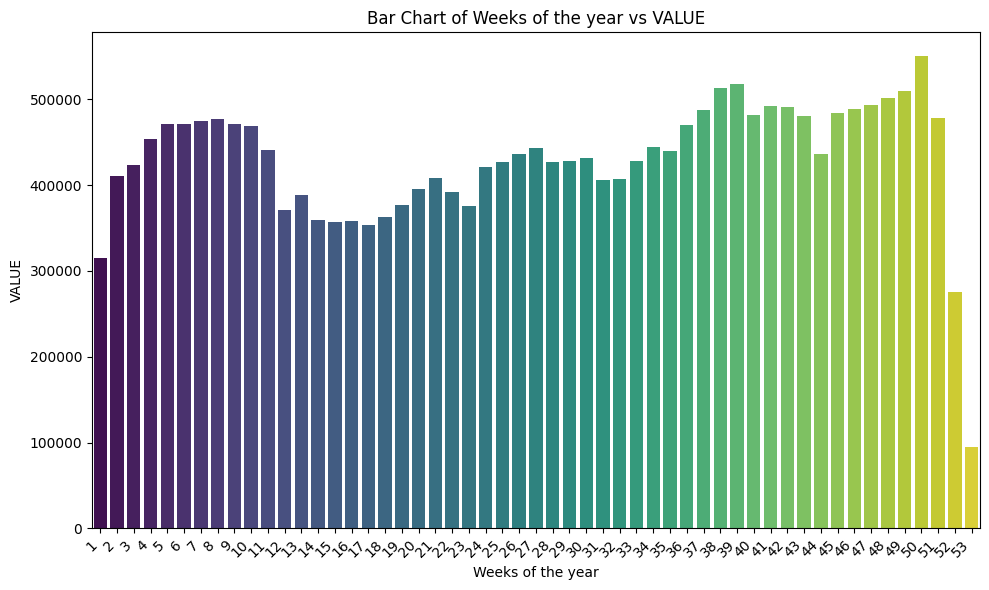

In [113]:
# Remove non-essential design elements, like gridlines and background color
plt.figure(figsize=(10, 6))
sns.barplot(x='Weeks', y='VALUE', data=df, ci=None, palette='viridis')
plt.xlabel('Weeks of the year')
plt.ylabel('VALUE')
plt.title('Bar Chart of Weeks of the year vs VALUE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Erase redundant data ink:

Recommends eliminating redundant or duplicative ink that does not provide additional meaningful information.


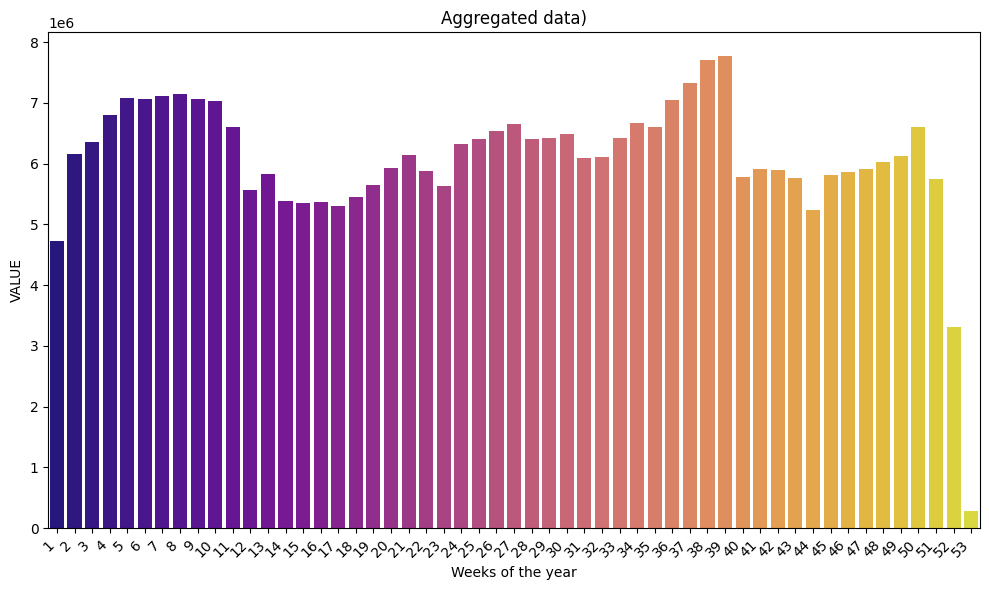

In [114]:
# Aggregate the data by 'Type of Vehicle'
df_agg = df.groupby('Weeks')['VALUE'].sum().reset_index()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x='Weeks', y='VALUE', data=df_agg, ci=None, palette='plasma')
plt.xlabel('Weeks of the year')
plt.ylabel('VALUE')
plt.title('Aggregated data)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Revise and edit:

Emphasizes the importance of continuous revision and editing to enhance clarity, accuracy, and overall effectiveness.


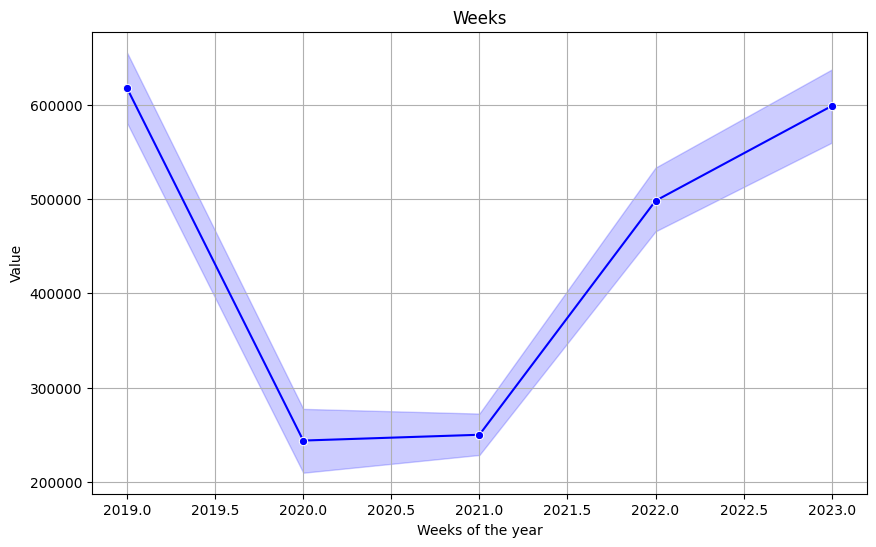

In [115]:
# Assuming your dataset has columns 'Year' and 'VALUE,' and you want to visualize the trend over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='VALUE', data=df, marker='o', color='blue')
plt.title('Weeks')
plt.xlabel('Weeks of the year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#Maximize the data ink ratio, within reason:

Acknowledges the need for balance, advising designers to avoid excessive complexity that could hinder readability while still maximizing the data-ink ratio.


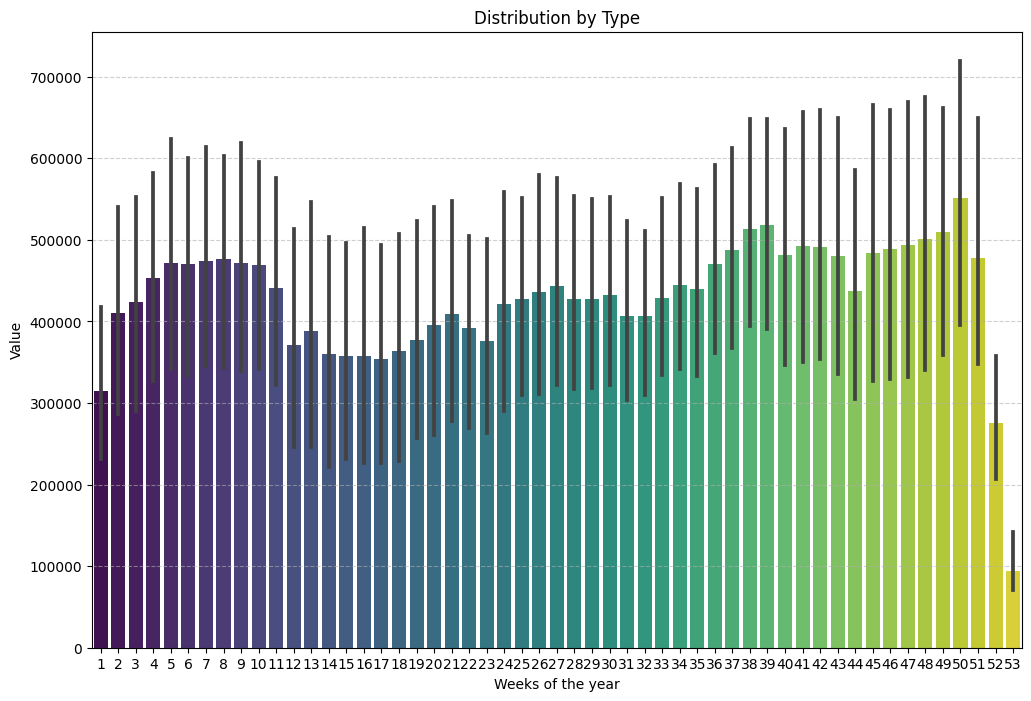

In [116]:
# Assuming your dataset has columns 'Type of Vehicle' and 'VALUE,' and you want to visualize the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Weeks', y='VALUE', data=df, palette='viridis')
plt.title('Distribution by Type')
plt.xlabel('Weeks of the year')
plt.ylabel('Value')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

The  codes demonstrate the implementation of Edward Tufte's principles for effective data visualization. It presents different visualizations using Python libraries like Matplotlib and Seaborn while focusing on maximizing the data-ink ratio and improving graphical clarity. Here's an explanation of the code's sections and how they align with Tufte's principles:


 Code Explanation:

1. Displaying the First Few Rows of the Dataset:**
   - Prints the first few rows of the DataFrame (`df1`) to provide a glimpse of the dataset.

2. Creating a Bar Chart (Maximize Data-Ink Ratio):**
   - Implements a bar chart using Matplotlib, emphasizing the data-ink ratio by removing non-essential design elements and rotating x-axis labels for better readability.
   - Calculates the data-ink ratio, which represents the ratio of ink/pixels used to represent non-redundant data information to the total ink used in the chart.

3. Creating a Simplified Bar Chart with Seaborn (Erase Non-Data Ink):**
   - Utilizes Seaborn to plot a simpler bar chart, removing non-essential design elements like gridlines and background color.
   - Focuses on reducing non-data ink to enhance the clarity of the visualization.

4. Aggregating and Plotting Aggregated Data (Erase Redundant Data Ink):
   - Aggregates the data by 'Weeks' to eliminate redundant or duplicative ink that does not provide additional meaningful information.
   - Displays a bar chart using Seaborn with aggregated data to streamline the representation and remove unnecessary redundancies.

5. Visualizing Trends Over Years (Revise and Edit):**
   - Demonstrates a line plot using Seaborn to visualize trends over years ('Year' vs. 'VALUE').
   - Implements gridlines and markers for data points to enhance clarity and accuracy.

6. Visualizing Distribution by Type (Maximize Data Ink Ratio, Within Reason):**
   - Creates a bar plot using Seaborn to display the distribution by 'Weeks' of the year and 'VALUE.'
   - Incorporates gridlines for the y-axis to improve readability without compromising the data-ink ratio significantly.

How it Helps:

- Adherence to Tufte's Principles:** The code demonstrates adherence to Edward Tufte's principles by focusing on maximizing the data-ink ratio, eliminating non-data ink, reducing redundancy, and enhancing clarity and accuracy in visualizations.
  
- Effective Visualization Techniques:** It showcases different approaches to visualize data while balancing simplicity, clarity, and information richness, which can be beneficial for conveying information effectively to an audience.

- Understanding Data Representation:** Applying these principles aids in creating visualizations that present data clearly and effectively, enabling better interpretation and understanding of underlying trends or patterns.

By following these principles, the code aims to create visualizations that emphasize relevant data information while minimizing distractions or unnecessary graphical elements, ultimately leading to more effective communication of insights within the data.